In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install nbconvert


In [2]:
df = pd.read_csv('coaster_db.csv')

## Exploratory analysis 

1 . Distinguish Numerical and categorical features.

2 . Handle missing and Null values

3 . Identify / remove outliers in the data

4 . Further clean the data.

In [3]:
df.head(10)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
5,Cannon Coaster,NaN,NaN,Coney Island,Removed,1902,Wood,George Francis Meyer,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,40.0,ft,NaN,0,NaN
6,Leap-The-Dips,"1,452 ft (443 m)",10 mph (16 km/h),Lakemont Park,Operating,1902,Wood – Side friction,Federal Construction Company,NaN,NaN,...,10 mph,16 km/h,10.0,mph,10.0,41.0,ft,NaN,0,NaN
7,Figure Eight (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
8,Drop the Dip,NaN,NaN,Coney Island,Removed,"June 6, 1907",Other,Arthur Jarvis,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,60.0,ft,NaN,0,NaN
9,Scenic Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [4]:
df.describe()


,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [5]:
df.dtypes


coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

Get only the numeric data first to handle.

In [6]:
df._get_numeric_data()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
0,NaN,1884,40.5740,-73.9780,6.0,6.0,50.0,NaN,0,2.9
1,1.0,1895,40.5780,-73.9790,NaN,NaN,NaN,NaN,1,12.0
2,NaN,1896,41.5800,-81.5700,NaN,NaN,NaN,NaN,0,NaN
3,1.0,1901,40.5745,-73.9780,NaN,NaN,NaN,NaN,1,NaN
4,1.0,1901,39.3538,-74.4342,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...
1082,3.0,2022,NaN,NaN,53.0,53.0,111.0,NaN,3,4.7
1083,2.0,2022,37.2339,-76.6426,73.0,73.0,178.0,NaN,2,NaN
1084,0.0,2022,NaN,NaN,59.3,59.3,78.1,NaN,0,4.0
1085,0.0,2022,NaN,NaN,34.0,34.0,112.0,NaN,0,NaN


In [7]:
df.select_dtypes(include=['object']).columns.tolist()


['coaster_name',
 'Length',
 'Speed',
 'Location',
 'Status',
 'Opening date',
 'Type',
 'Manufacturer',
 'Height restriction',
 'Model',
 'Height',
 'Lift/launch system',
 'Cost',
 'Trains',
 'Park section',
 'Duration',
 'Capacity',
 'G-force',
 'Designer',
 'Max vertical angle',
 'Drop',
 'Soft opening date',
 'Fast Lane available',
 'Replaced',
 'Track layout',
 'Fastrack available',
 'Soft opening date.1',
 'Closing date',
 'Opened',
 'Replaced by',
 'Website',
 'Flash Pass Available',
 'Must transfer from wheelchair',
 'Theme',
 'Single rider line available',
 'Restraint Style',
 'Flash Pass available',
 'Acceleration',
 'Restraints',
 'Name',
 'Type_Main',
 'opening_date_clean',
 'speed1',
 'speed2',
 'speed1_unit',
 'height_unit']

In [8]:
df = df[['coaster_name','Location', 'Status','Manufacturer','year_introduced','latitude', 'longitude','Type_Main','opening_date_clean','speed_mph', 'height_ft','Inversions_clean', 'Gforce_clean']].copy()

Let's get the factors that we want to analyse seperately first.

In [9]:
df

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaN,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,2022,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaN,34.0,NaN,0,NaN


In [10]:
df.isna().sum() # Find the factors with NA values.


coaster_name            0
Location                0
Status                213
Manufacturer           59
year_introduced         0
latitude              275
longitude             275
Type_Main               0
opening_date_clean    250
speed_mph             150
height_ft             916
Inversions_clean        0
Gforce_clean          725
dtype: int64

In [11]:
df.loc[df.duplicated()] ## Seems as though there is no repeated rows.
## TO handle repeated rows , we could have removed : first duplicate , last duplicate or remove both.



,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean


In [12]:
df.loc[df.duplicated(subset=['coaster_name'])] 


,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaN,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaN,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaN,53.0,NaN,3,4.7


In [13]:
df.query('coaster_name == "Crystal Beach Cyclone"') # looking at duplicate val


,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [14]:

df.drop_duplicates(subset=['coaster_name','Location','opening_date_clean'],keep='first') 



,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
1081,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaN,34.0,NaN,0,NaN


In [15]:
df.query('coaster_name == "Crystal Beach Cyclone"')


,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


## Visual Analytics


In [16]:
df['year_introduced'].value_counts()


1999    49
2000    47
1998    32
2011    31
2001    30
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: year_introduced, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

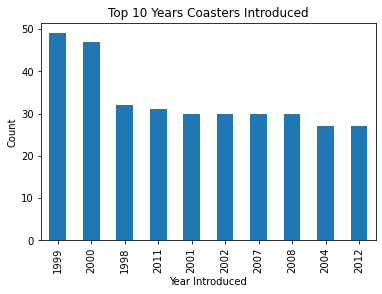

In [17]:
ax = df['year_introduced'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Years Coasters Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

Text(0.5, 0, 'Speed (mph)')

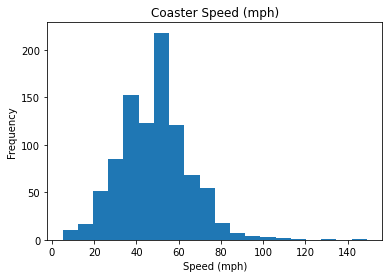

In [18]:
ax = df['speed_mph'].plot(kind='hist',
                          bins=20,
                          title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Speed (mph)')

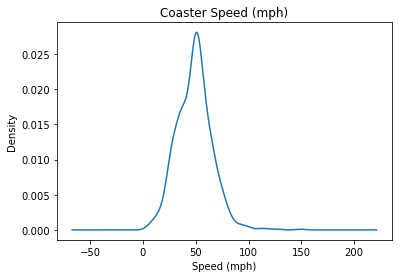

In [19]:
ax = df['speed_mph'].plot(kind='kde',
                          title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

### Since coaster speed is highly concentrated around the the center with a bell curve distribution, we can replace the rows will null values with the average coaster speed.

In [20]:
df['speed_mph'].fillna((df['speed_mph'].mean()), inplace=True)


In [21]:
df

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.000000,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,48.617289,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,48.617289,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,48.617289,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,48.617289,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaN,53.000000,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.000000,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,2022,NaN,NaN,Steel,2016-06-16,59.300000,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaN,34.000000,NaN,0,NaN


Text(0.5, 0, 'Height (ft)')

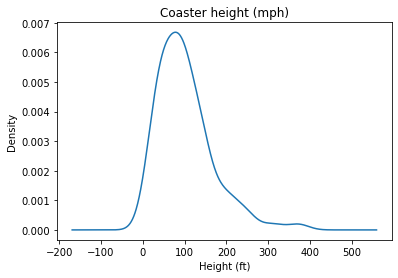

In [22]:
ax = df['height_ft'].plot(kind='kde',
                          title='Coaster height (mph)')
ax.set_xlabel('Height (ft)')

### As coaster height is a bit more skewed , let us just remove the na valued rows.

In [23]:
df = df.dropna(subset=['height_ft'])
df
 

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
15,The Great Scenic Railway,Luna Park Melbourne,Operating,LaMarcus Thompson,1912,NaN,NaN,Wood,1912-12-01,37.300000,52.5,0,NaN
25,Roller Coaster (Lagoon),Lagoon Amusement Park,Operating,NaN,1921,40.9849,-111.8951,Wood,1921-07-15,45.000000,62.0,0,NaN
51,Dragon Coaster (Playland),Playland,Operating,NaN,1929,40.9675,-73.6739,Wood,1929-01-01,48.617289,78.7,0,NaN
53,Yankee Cannonball,Canobie Lake Park,Operating,Philadelphia Toboggan Coasters,1930,42.7953,-71.2492,Wood,1930-01-01,35.000000,65.0,0,NaN
71,Big Dipper (Battersea Park),Battersea Park,Removed,NaN,1951,51.4794,-0.1569,Wood,1951-01-01,48.617289,49.2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,Zadra (roller coaster),Energylandia,Operating,Rocky Mountain Construction,2019,50.0019,19.4031,Other,2019-08-22,75.200000,206.0,3,4.0
1049,Max & Moritz (roller coaster),Efteling,Operating,Mack Rides,2020,51.6481,5.0474,Steel,2020-06-20,22.400000,19.7,0,NaN
1052,Pitts Special (roller coaster),PowerPark,Operating,Gerstlauer,2020,63.2307,22.8545,Steel,2020-06-24,62.100000,142.7,0,4.5
1065,Looping Star (Clacton Pier),Clacton Pier,Operating,Pinfari,2021,51.7864,-1.1550,Steel,2021-10-23,48.617289,36.1,1,NaN


##### Analyse speed vs height

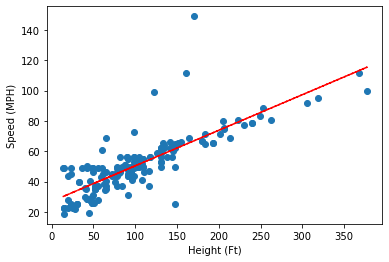

In [24]:
y = df['speed_mph']
x = df['height_ft']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.scatter(x, y)
plt.ylabel("Speed (MPH)")
plt.xlabel("Height (Ft)")

plt.show()


In [25]:
# as the percentage of Gforce rows being NaN is very high, we will just remove them, then analayse with respect to height.
df = df.dropna(subset=['Gforce_clean'])


In [26]:
df

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
183,Python (Efteling),Efteling,Operating,Vekoma,1981,51.6469,5.0536,Steel,1981-04-12,46.6,95.1,4,3.5
225,Mindbender (Galaxyland),Galaxyland,closed for maintenance as of july 30 no reopen...,Anton Schwarzkopf,1985,53.5236,-113.6203,Steel,1985-12-20,60.0,145.0,3,5.2
247,Lisebergbanan,Liseberg,Operating,Zierer,1987,57.6950,11.9925,Steel,1987-04-18,49.7,147.6,0,3.0
272,Eurosat - CanCan Coaster,Europa-Park,Operating,Mack Rides,1989,NaN,NaN,Steel,1989-01-01,37.3,83.7,0,4.0
275,Goudurix,Parc Astérix,Operating,Vekoma,1989,49.1314,2.5714,Steel,1989-01-01,55.9,118.1,7,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,DC Rivals HyperCoaster,Warner Bros. Movie World,Operating,Mack Rides,2017,-27.9080,153.3140,Steel,2017-09-22,71.5,202.1,0,4.3
1004,Hyperion (roller coaster),Energylandia,Operating,Intamin,2018,NaN,NaN,Steel,2018-07-14,88.2,252.6,1,4.8
1031,Hakugei (roller coaster),Nagashima Spa Land,Operating,Rocky Mountain Construction,2019,35.0303,136.7347,Steel,2019-03-28,66.5,180.4,3,4.0
1046,Zadra (roller coaster),Energylandia,Operating,Rocky Mountain Construction,2019,50.0019,19.4031,Other,2019-08-22,75.2,206.0,3,4.0


##### Analyse Gforce vs height

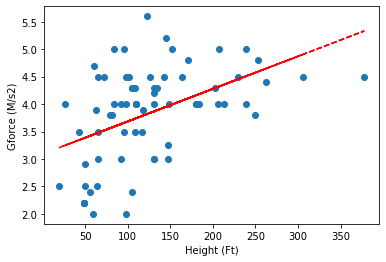

In [27]:
y = df['Gforce_clean']
x = df['height_ft']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.scatter(x, y)
plt.ylabel("Gforce (M/s2)")
plt.xlabel("Height (Ft)")

plt.show()

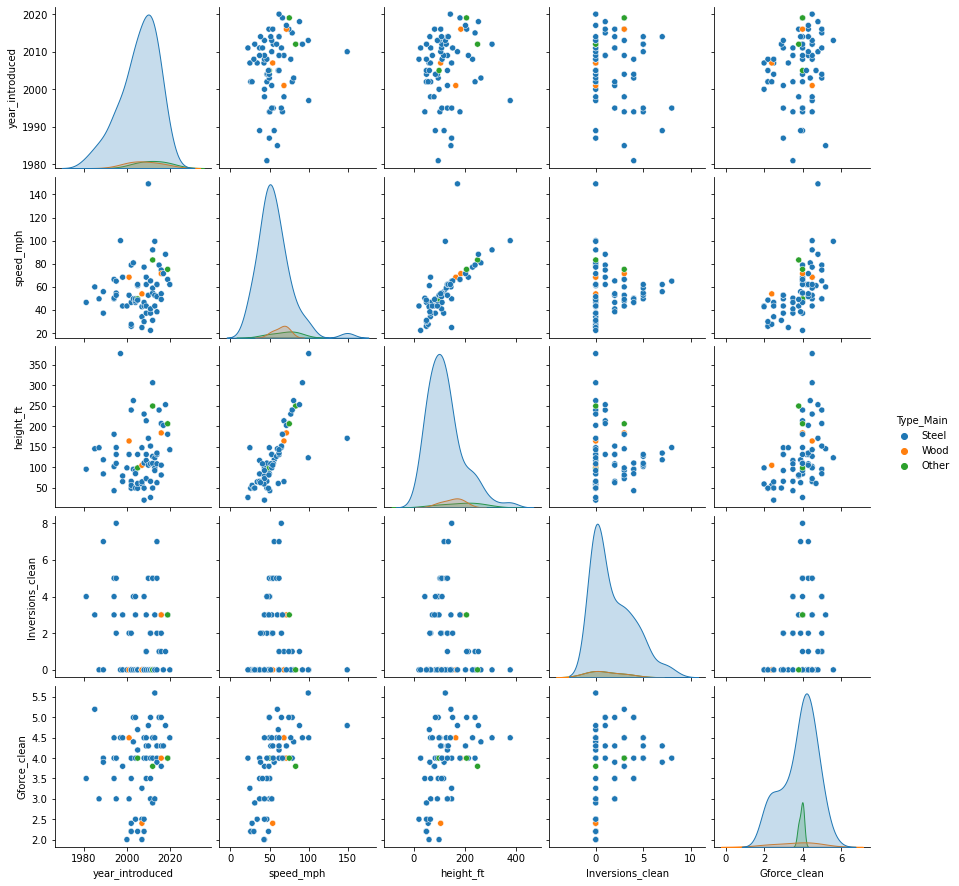

In [28]:
sns.pairplot(df,
             vars=['year_introduced','speed_mph',
                   'height_ft','Inversions_clean','Gforce_clean'],
            hue='Type_Main')
plt.show()